In [76]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k-Nearest Neighbors (kNN) is a machine learning algorithm used for both classification and regression problems. In a kNN algorithm, data points are stored, and a prediction is made for a new data point by identifying the k nearest data points to the new data point and aggregating the results from those k data points. In a classification problem, if k = 3, the three nearest data points to the new data point are examined, and the most frequent class among those three data points is assigned as the predicted class for the new data point. In a regression problem, the mean or median value of the k nearest data points is used as the predicted output value for the new data point.

### Use the iris.csv Download iris.csv dataset for this question. How does the performance of k-nearest neighbors change as k takes on the following values: 1, 3, 5, 7? Which of these is the optimal value of k? Which distance/similarity metric did you choose to use and why?

In [4]:
iris = pd.read_csv("iris.csv")

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
### specify predictors and predicted value
y = iris['variety']
X = iris[["sepal.length" , "sepal.width" , "petal.length" , "petal.width"]]

In [117]:
### splitting into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 178)


In [124]:
### function for k, and distance matrix test
def knn_with_k_and_dis(k , dis):    
    ### specify model with k number of neighbors and distance matrix
    knn = KNeighborsClassifier(n_neighbors = k , metric = dis)
    
    ### fit the model
    knn.fit(X_train, y_train)
    
    score = knn.score(X_test, y_test) 
    
    ### print score
    print(f"Score for model with number of k = {k} : ", score , '\n')
    
    ### return score
    return score

In [143]:
### plot error rate and number of k
def plot_error_rate(error_list):
    pyplot.figure(figsize = (5 , 3))
    pyplot.plot([1, 3, 5, 7] , error_list,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
    pyplot.title('Error Rate vs. K Value', fontsize = 12)
    pyplot.xlabel('K',fontsize = 8)
    pyplot.ylabel('Error (misclassification) Rate',fontsize = 8)

### Euclidean distance

Score for model with number of k = 1 :  0.9333333333333333 

Score for model with number of k = 3 :  0.9333333333333333 

Score for model with number of k = 5 :  1.0 

Score for model with number of k = 7 :  1.0 



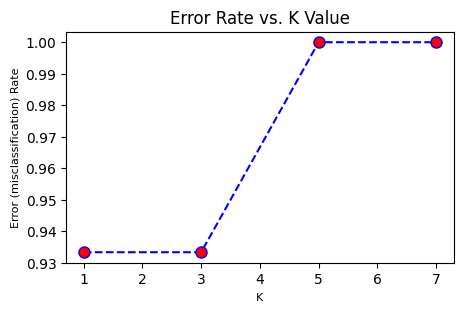

In [144]:
error_list = []

### K = 1
one = knn_with_k_and_dis(1 , 'euclidean')
error_list.append(one)

### k = 3
three = knn_with_k_and_dis(3 , 'euclidean')
error_list.append(three)

### k = 5
five = knn_with_k_and_dis(5 , 'euclidean')
error_list.append(five)

### k = 7
seven = knn_with_k_and_dis(7 , 'euclidean')
error_list.append(seven)

plot_error_rate(error_list)

### minkowski

Score for model with number of k = 1 :  0.9333333333333333 

Score for model with number of k = 3 :  0.9333333333333333 

Score for model with number of k = 5 :  1.0 

Score for model with number of k = 7 :  1.0 



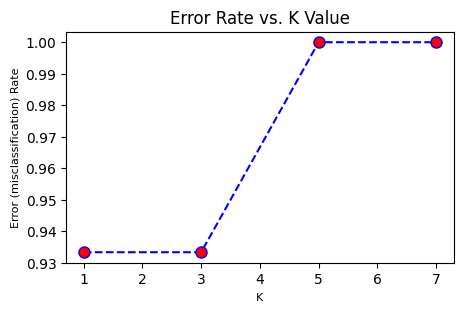

In [145]:
error_list = []

### K = 1
one = knn_with_k_and_dis(1 , 'minkowski')
error_list.append(one)

### k = 3
three = knn_with_k_and_dis(3 , 'minkowski')
error_list.append(three)

### k = 5
five = knn_with_k_and_dis(5 , 'minkowski')
error_list.append(five)

### k = 7
seven = knn_with_k_and_dis(7 , 'minkowski')
error_list.append(seven)

plot_error_rate(error_list)


### Manhattan distance

Score for model with number of k = 1 :  0.9333333333333333 

Score for model with number of k = 3 :  0.9666666666666667 

Score for model with number of k = 5 :  0.9666666666666667 

Score for model with number of k = 7 :  0.9666666666666667 



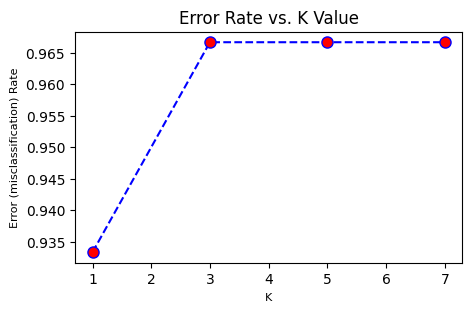

In [146]:
### K = 1
error_list = []

### K = 1
one = knn_with_k_and_dis(1 , 'cityblock')
error_list.append(one)

### k = 3
three = knn_with_k_and_dis(3 , 'cityblock')
error_list.append(three)

### k = 5
five = knn_with_k_and_dis(5 , 'cityblock')
error_list.append(five)

### k = 7
seven = knn_with_k_and_dis(7 , 'cityblock')
error_list.append(seven)

plot_error_rate(error_list)

### Optimal value of k?

From the above trials, I think the best value for **k is 5**, given that the performance between k=5 under either disdtance calculation is more stable

### Which distance/similarity metric did you choose to use and why?

**Minkowski metric**

Minkowski distance is more sound under n-dimensional spaces, in our cases, while we have more than two dimensions, Minkowski might be a better distance measure to apply here. 